In [ ]:
import socket 
import json
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import *
HOST = 'IP address' # IP address
PORT = 6531 # Port to listen on (use ports > 1023)
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind((HOST, PORT))
    s.listen()
    print("Starting server at: ", (HOST, PORT))
    conn, addr = s.accept()
    with conn:
        print("Connected at", addr)
        n, acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, mag_x, mag_y, mag_z, t, h, p = [], [], [], [], [], [], [], [], [], [], [], [], []
        while True:
            data = conn.recv(1024)
            print("Received from socket server:", data)
            if (data.decode().count('{') != 1):
                continue
            obj = json.loads(data)
            n.append(obj['s'])
            #g
            acc_x.append(obj['acc_x'])
            acc_y.append(obj['acc_y'])
            acc_z.append(obj['acc_z'])
            #dps(degree per second)
            gyro_x.append(obj['gyro_x'])
            gyro_y.append(obj['gyro_y'])
            gyro_z.append(obj['gyro_z'])
            #G(gauss)
            mag_x.append(obj['mag_x'])
            mag_y.append(obj['mag_y'])
            mag_z.append(obj['mag_z'])
            #degC
            t.append(obj['t'])
            #%
            h.append(obj['h'])
            #hPa
            p.append(obj['p'])
            
            if n[-1] == 100:
                break
            #clear_output(wait=True) 

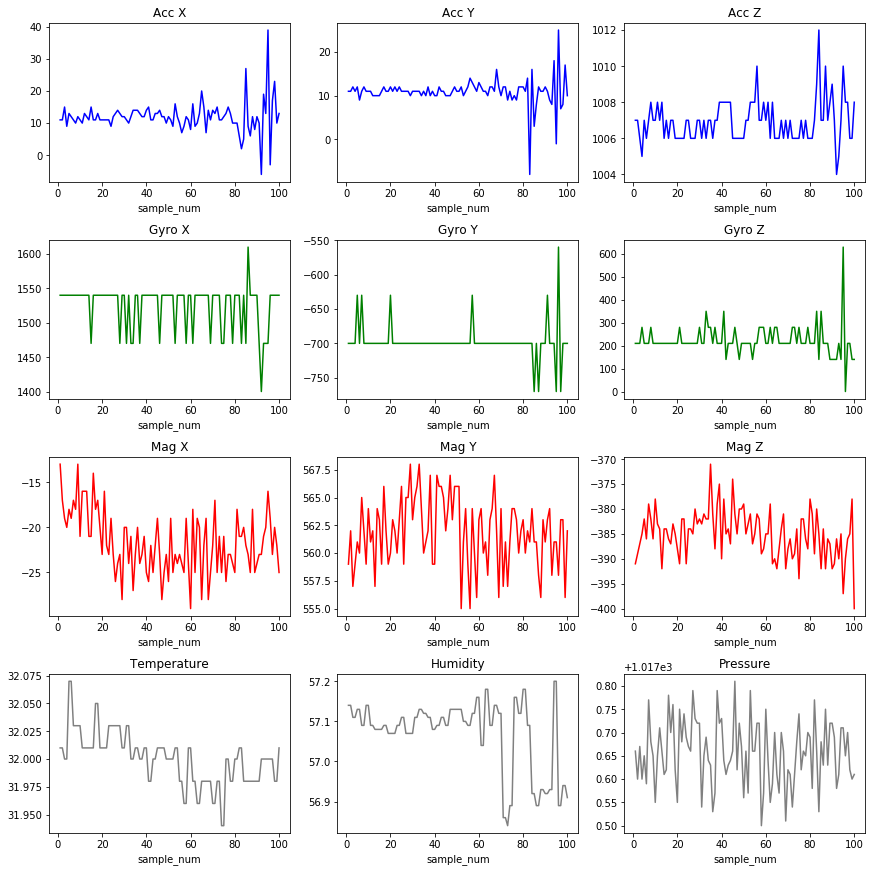

In [38]:
fig, ax = plot.subplots(4, 3, constrained_layout=True)
ax[0, 0].plot(n, acc_x, c='blue')
ax[0, 0].set_title('Acc X')
ax[0, 0].set_xlabel('sample_num')
ax[0, 1].plot(n, acc_y, c='blue')
ax[0, 1].set_title('Acc Y')
ax[0, 1].set_xlabel('sample_num')
ax[0, 2].plot(n, acc_z, c='blue')
ax[0, 2].set_title('Acc Z')
ax[0, 2].set_xlabel('sample_num')
ax[1, 0].plot(n, gyro_x, c='green')
ax[1, 0].set_title('Gyro X')
ax[1, 0].set_xlabel('sample_num')
ax[1, 1].plot(n, gyro_y, c='green')
ax[1, 1].set_title('Gyro Y')
ax[1, 1].set_xlabel('sample_num')
ax[1, 2].plot(n, gyro_z, c='green')
ax[1, 2].set_title('Gyro Z')
ax[1, 2].set_xlabel('sample_num')
ax[2, 0].plot(n, mag_x, c='red')
ax[2, 0].set_title('Mag X')
ax[2, 0].set_xlabel('sample_num')
ax[2, 1].plot(n, mag_y, c='red')
ax[2, 1].set_title('Mag Y')
ax[2, 1].set_xlabel('sample_num')
ax[2, 2].plot(n, mag_z, c='red')
ax[2, 2].set_title('Mag Z')
ax[2, 2].set_xlabel('sample_num')
ax[3, 0].plot(n, t, c='gray')
ax[3, 0].set_title('Temperature')
ax[3, 0].set_xlabel('sample_num')
ax[3, 1].plot(n, h, c='gray')
ax[3, 1].set_title('Humidity')
ax[3, 1].set_xlabel('sample_num')
ax[3, 2].plot(n, p, c='gray')
ax[3, 2].set_title('Pressure')
ax[3, 2].set_xlabel('sample_num')

fig.set_size_inches(12, 12)